In [1]:
import numpy as np
import time, os, numbers
import pandas as pd
import matplotlib.pyplot as plt
import sys  
import seaborn as sns
sns.set()
sys.path.insert(0, './scripts')
from PricingModels import Element_Pricing_Model, Market, YieldsSpacev2_Pricing_model

In [16]:
token_price = 3
token_supply = 1*1e7
market_value = token_price * token_supply
growth_rate = 0.5 # 50% annualized growth rate
funding_need = market_value/1 # 6 million per year ($200k/yr for 30 staff or $100k/yr for 60 staff)

columns = ['token_price', 'token_supply', 'market_value', 'growth_rate', 'new_tokens', 'funding_acquired', 'old_token_price', 'new_token_price']
df = pd.DataFrame(data=[[token_price, token_supply, market_value, growth_rate, np.nan, np.nan, 0, 0]]
    ,columns=columns)
for t in range(1,11):
    growth_rate = growth_rate*0.8
    market_value = market_value * (1 + growth_rate)
    old_token_price = market_value/token_supply
    new_tokens = funding_need/old_token_price
    funding_acquired = 0
    token_price = old_token_price
    # print('{} tokens needed, price from {}→{} diff={}'.format(new_tokens,token_price,market_value/(token_supply+new_tokens),funding_need - funding_acquired))
    while funding_acquired - funding_need < -1:
        token_price = market_value/(token_supply+new_tokens)
        new_tokens = funding_need/token_price # update tokens being printed
        funding_acquired = token_price * new_tokens
        print('{} tokens needed, price from {}→{} diff={}'.format(new_tokens,old_token_price,market_value/(token_supply+new_tokens),funding_acquired - funding_need))
    token_supply += new_tokens
    df = pd.concat([df,pd.DataFrame(data=[[token_price, token_supply, market_value, growth_rate, new_tokens, funding_acquired, old_token_price, token_price]], columns=columns, index=[t])])
display(df.style.format({'token_supply': '{:,.0f}', 'market_value': '{:,.0f}', 'growth_rate': '{:,.0%}', 'new_tokens': '{:,.0f}', 'funding_acquired': '{:,.0f}'}))

12244897.959183672 tokens needed, price from 4.2→1.8880733944954131 diff=0.0
18550963.422418498 tokens needed, price from 2.492256880733945→1.358961378003945 diff=3.725290298461914e-09
25148569.019523274 tokens needed, price from 1.7068554907729547→1.0559290538479138 diff=3.725290298461914e-09
32014174.814229622 tokens needed, price from 1.2721833240759668→0.8564168965816356 diff=0.0
39346249.459890395 tokens needed, price from 0.9967322409175707→0.7111074136773666 diff=3.725290298461914e-09
47431125.91933802 tokens needed, price from 0.8043136846028864→0.5978054368307966 diff=0.0
56588402.17400648 tokens needed, price from 0.6604898802038256→0.5056109303685908 diff=0.0
67159761.96902893 tokens needed, price from 0.5480246493223648→0.4287147735005289 diff=0.0
79515632.88398762 tokens needed, price from 0.45748533493016674→0.3637295184575299 diff=0.0
94068199.74863416 tokens needed, price from 0.38325709828709137→0.3084703317538252 diff=0.0


,token_price,token_supply,market_value,growth_rate,new_tokens,funding_acquired,old_token_price,new_token_price
0,3.000000,"10,000,000","30,000,000",50%,nan,nan,0.000000,0.000000
1,2.450000,"22,244,898","42,000,000",40%,"12,244,898","30,000,000",4.200000,2.450000
2,1.617167,"40,795,861","55,440,000",32%,"18,550,963","30,000,000",2.492257,1.617167
3,1.192911,"65,944,430","69,632,640",26%,"25,148,569","30,000,000",1.706855,1.192911
4,0.937085,"97,958,605","83,893,405",20%,"32,014,175","30,000,000",1.272183,0.937085
5,0.762461,"137,304,855","97,638,500",16%,"39,346,249","30,000,000",0.996732,0.762461
6,0.632496,"184,735,981","110,436,174",13%,"47,431,126","30,000,000",0.804314,0.632496
7,0.530144,"241,324,383","122,016,246",10%,"56,588,402","30,000,000",0.660490,0.530144
8,0.446696,"308,484,145","132,251,710",8%,"67,159,762","30,000,000",0.548025,0.446696
9,0.377284,"387,999,778","141,126,972",7%,"79,515,633","30,000,000",0.457485,0.377284


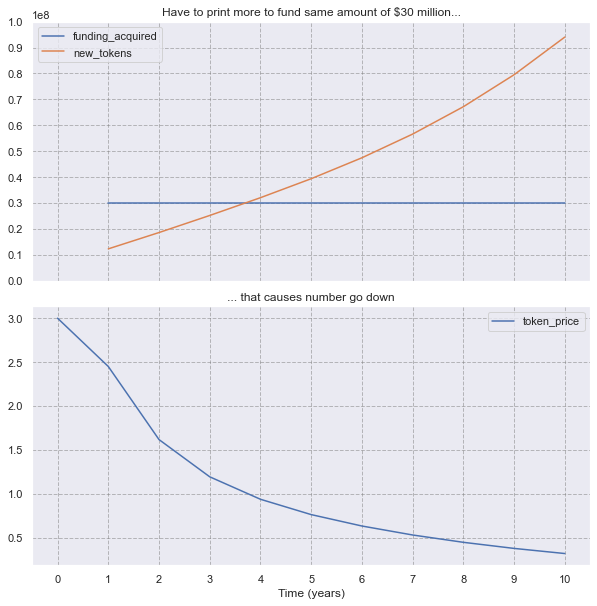

In [17]:
numPlots = 2
fig, ax = plt.subplots(ncols=1, nrows=numPlots,gridspec_kw = {'wspace':0, 'hspace':0.1, 'height_ratios':np.ones(numPlots)}, sharex=True)
fig.patch.set_facecolor('white')   # set fig background color to white

currentPlot = 0
df.plot(use_index=True, y=['funding_acquired','new_tokens'], figsize=(10,5*numPlots), ax=ax[currentPlot]\
    , title='Have to print more to fund same amount of ${:,.0f} million...'.format(funding_need/1e6))
ax[currentPlot].grid(visible=True,linestyle='--', linewidth='1', color='grey',which='both', alpha=0.5)
# display(token_price)
# display(np.ceil(token_price))
# display(np.arange(0,np.ceil(token_price)+1,1))
ax[currentPlot].set_yticks(np.arange(0,np.ceil(new_tokens/1e7)*1e7+1e7,1e7))

currentPlot = 1
df.plot(use_index=True, y='token_price', figsize=(10,5*numPlots), ax=ax[currentPlot], title='... that causes number go down')
ax[currentPlot].grid(visible=True,linestyle='--', linewidth='1', color='grey',which='both', alpha=0.5)

#for final plot
ax[currentPlot].set_xlabel('Time (years)')
plt.xticks(df.index)
plt.show()